<a href="https://colab.research.google.com/github/baldpanda/mnist/blob/experimenting-with-notebook/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning TensorFlow and Keras- MNIST

Taking the learnings from the Introduction to TensorFlow for AI, ML, and Deep Learning on Coursera and experimenting with them on the MNIST dataset. 

**Note** - Collab gives the option of running notebook on GPU enabled machine. This seems to speed up training significantly.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from google.colab import drive
from PIL import Image
print(tf.VERSION)

1.13.1


In [0]:
random.seed(42)

Keras comes with a number of inbuilt datasets. These include:

*   CIFAR10 AND CIFAR100 image classification (50,000 images with 10 and 100 different classes respectively)
*   MNIST
*   Fashion MNIST
*   Boston Housing Regression Dataset




In [0]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print('The training data has shape: {}.'.format(X_train.shape))

The training data has shape: (60000, 28, 28).


In [6]:
print('The testing data has size: {}.'.format(X_test.shape[0]))

The testing data has size: 10000.


Plotting an image from the training data sampled at random.

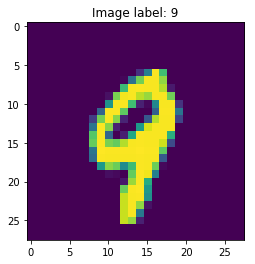

In [7]:
number_to_plot = random.randint(0,X_train.shape[0])
plt.title("Image label: {}".format(y_train[number_to_plot]))
plt.imshow(X_train[number_to_plot])
plt.show()

In [8]:
X_train[number_to_plot].shape

(28, 28)

Normalising the data 

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Building a fully connected neural network and fitting on the training data

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2555 - acc: 0.9267
Epoch 2/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1117 - acc: 0.9670
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0781 - acc: 0.9762
Epoch 4/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0581 - acc: 0.9826
Epoch 5/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0455 - acc: 0.9861


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.0742 - acc: 0.9780


[0.07418043108503335, 0.978]

Building a basic 2 layer fully connected NN that achieves 97.8% accuracy on the test data. 

Adding callback function, which stops training once the model achieves an accuracy of xx.x% on the training data and adding an extra layer to the NN.

In [0]:
class myCallback(tf.keras.callbacks.Callback):  
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > 0.999:
      print("\nYou've exceded an accuracy of 99.9%")
      self.model.stop_training = True  

In [0]:
callbacks = myCallback()

In [0]:
two_layer_network = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [0]:
two_layer_network.compile(optimizer=tf.train.AdamOptimizer(),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [19]:
two_layer_network.fit(X_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1928 - acc: 0.9426
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0803 - acc: 0.9757
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0553 - acc: 0.9824
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0406 - acc: 0.9865
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0333 - acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0292 - acc: 0.9909
Epoch 7/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0220 - acc: 0.9932
Epoch 8/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0218 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0171 - acc: 0.9946
Epoch 10/10
60000/60000 [==============================] - 5s 75us/sample - loss: 

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Convolutional Neural Network

In [0]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [0]:
cnn_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [23]:

cnn_model.fit(X_train, y_train, epochs=15, callbacks=[callbacks])

Epoch 1/15
60000/60000 [==============================] - 11s 177us/sample - loss: 0.1219 - acc: 0.9624
Epoch 2/15
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0416 - acc: 0.9867
Epoch 3/15
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0284 - acc: 0.9907
Epoch 4/15
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0203 - acc: 0.9936
Epoch 5/15
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0153 - acc: 0.9950
Epoch 6/15
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0121 - acc: 0.9959
Epoch 7/15
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0101 - acc: 0.9964
Epoch 8/15
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0080 - acc: 0.9975
Epoch 9/15
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0079 - acc: 0.9970
Epoch 10/15
60000/60000 [==============================] - 9s 152us/samp

In [24]:
cnn_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 73us/sample - loss: 0.0445 - acc: 0.9916


[0.044504759450871824, 0.9916]

CNN model is achieving an accuracy of 99.2% on the test set! 

Taking a random sample from the test, and running the the model.

In [0]:
rand_test_samp = random.randint(1, 10000)

In [26]:
rand_test_image = X_test[rand_test_samp]
rand_test_image = rand_test_image.reshape(28,28)
rand_test_label = y_test[rand_test_samp]
print("The actual label of the sample test image is: {}".format(rand_test_label))

The actual label of the sample test image is: 9


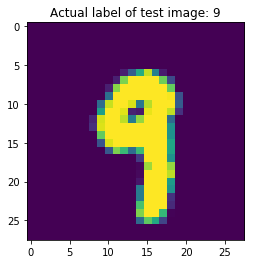

In [27]:
plt.imshow(rand_test_image)
plt.title("Actual label of test image: {}".format(rand_test_label))
plt.show()

In [28]:
rand_test_image = rand_test_image.reshape(1, 28, 28, 1)
rand_test_predicted_label = np.array(cnn_model.predict(rand_test_image)).argmax(axis=-1)[0]
print("Predicted label of image: {}".format(rand_test_predicted_label))
if (rand_test_predicted_label == rand_test_label):
  print("The model predicted the label correctly!")
else:
  print("The model predicted the label incorrectly :(")

Predicted label of image: 9
The model predicted the label correctly!


## Importing custom hand drawn digits

In [29]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
fig_eight = Image.open("/content/drive/My Drive/mnist/figure_eight.png")
fig_seven_paint = Image.open("/content/drive/My Drive/mnist/figure_seven_paint_thick.png")

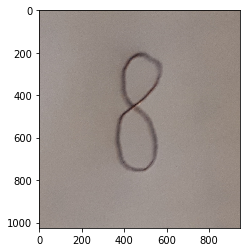

In [32]:
plt.imshow(fig_eight)

In [0]:
plt.imshow(fig_seven_paint)

In [0]:
plt.imshow(fig_eight_greyscale)

In [0]:
np_fig_eight_greyscale = np.array(fig_eight_greyscale)

In [0]:
np_fig_eight_greyscale.shape

(1025, 945)

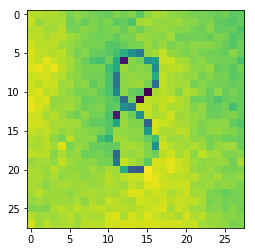

In [0]:
fig_eight_greyscale = fig_eight_greyscale.resize((28,28), Image.NEAREST)
plt.imshow(fig_eight_greyscale)

In [0]:
np_fig_eight_greyscale = np.array(fig_eight_greyscale)
np_fig_seven = np .array(fig_seven_paint)

In [0]:
# print("The new shape of the figure eight image is {}".format(np_fig_eight_greyscale.shape))
# print("The type of the image is {}".format(type(np_fig_eight_greyscale)))

TO DO: Need to process pixels so that they are on the same scale as the training data

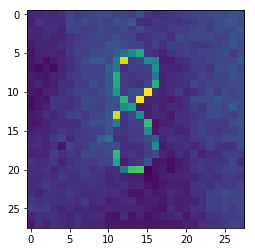

In [0]:
plt.imshow(255 - np_fig_eight_greyscale)

In [0]:
def make_prediction_for_png(cnn, image_png):
  # convert to greyscale and resize to 28 by 28
  image_scaled = image_png.convert('L').resize((28, 28), Image.NEAREST)
  np_image_scaled = np.array(image_scaled)
  np_image_scaled_norm = np_image_scaled / 255.0
  np_image_scaled_norm = np_image_scaled_norm.reshape(1, 28, 28, 1)
  return(cnn.predict(np_image_scaled_norm).argmax(axis=-1)[0])
  

In [45]:
make_prediction_for_png(cnn_model, fig_seven_paint)

7